### Import necessary libraries

In [2]:
import pandas as pd
import numpy as np

from scipy.stats import kurtosis
from scipy.stats import skew

import seaborn as sns
from matplotlib import pyplot as plt

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import influence_plot

import warnings
warnings.filterwarnings('ignore')

### 1. Prepare a prediction model for profit of 50_startups data.Do transformations for getting better predictions of profit and make a table containing R^2 value for each prepared model.

* R&D Spend -- Research and devolop spend in the past few years
* Administration -- spend on administration in the past few years
* Marketing Spend -- spend on Marketing in the past few years
* State -- states from which data is collected
* Profit  -- profit of each state in the past few years

### Import the data

In [3]:
startup = pd.read_csv("D:\\Downloads\\Prajnya\\Study related documet\\Assignments\\5.Multi linear regression\\50_Startups.csv")
startup.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
# Renaming Columns
startup=startup.rename({'R&D Spend':'RD', 'Marketing Spend':'Marketing'},axis=1)
startup.head()

,RD,Administration,Marketing,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


### EDA

In [5]:
startup.shape

(50, 5)

In [6]:
startup.isna().sum()

RD                0
Administration    0
Marketing         0
State             0
Profit            0
dtype: int64

In [8]:
startup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   RD              50 non-null     float64
 1   Administration  50 non-null     float64
 2   Marketing       50 non-null     float64
 3   State           50 non-null     object 
 4   Profit          50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [9]:
startup.dtypes

RD                float64
Administration    float64
Marketing         float64
State              object
Profit            float64
dtype: object

In [10]:
startup.duplicated().sum()

0

In [11]:
startup.describe()

,RD,Administration,Marketing,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [12]:
print(kurtosis(startup.RD))
print(kurtosis(startup.Administration))
print(kurtosis(startup.Marketing))
print(kurtosis(startup.Profit))

-0.8050676431519039
0.08553840791984113
-0.7240327111087308
-0.17529637679752152


In [13]:
print(skew(startup.RD))
print(skew(startup.Administration))
print(skew(startup.Marketing))
print(skew(startup.Profit))

0.15904052321503395
-0.4742300698920047
-0.04506631617666136
0.02258638356958943


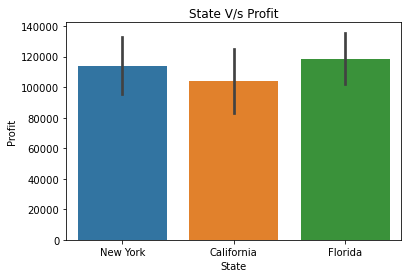

In [14]:
sns.barplot(x='State',y='Profit',data = startup)
plt.title("State V/s Profit")
plt.show()

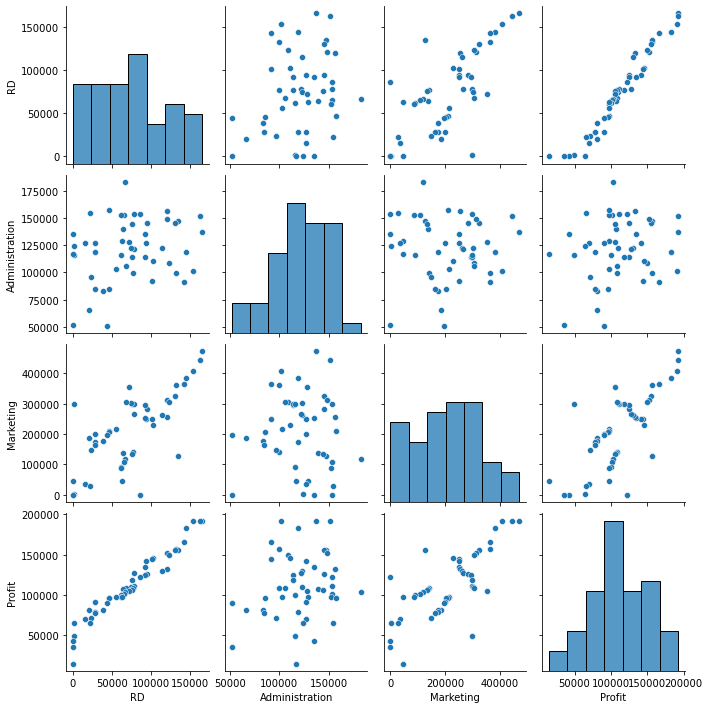

In [15]:
sns.pairplot(startup)
plt.show()

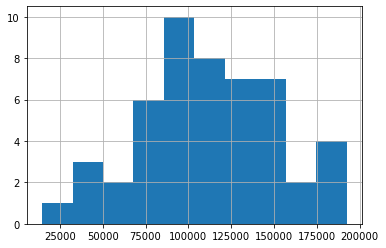

In [16]:
startup['Profit'].hist()
plt.show()

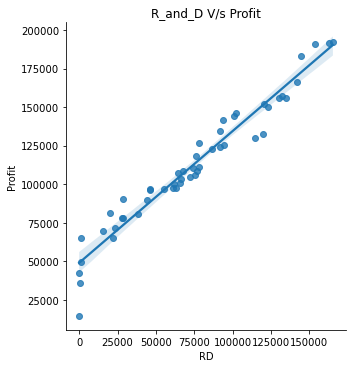

In [17]:
sns.lmplot(x='RD',y='Profit',data=startup)
plt.title('R_and_D V/s Profit')
plt.show()

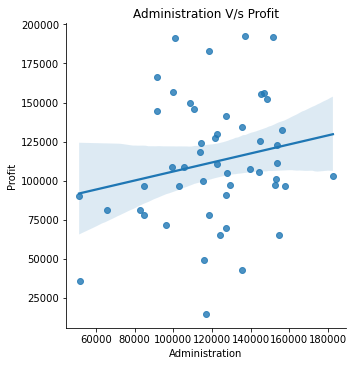

In [18]:
sns.lmplot(x='Administration',y='Profit',data=startup)
plt.title('Administration V/s Profit')
plt.show()

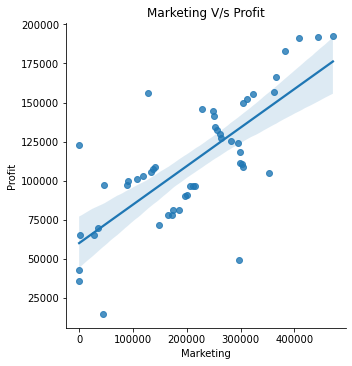

In [19]:
sns.lmplot(x='Marketing',y='Profit',data=startup)
plt.title('Marketing V/s Profit')
plt.show()

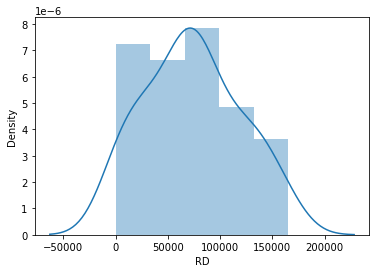

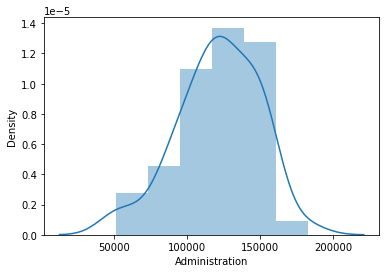

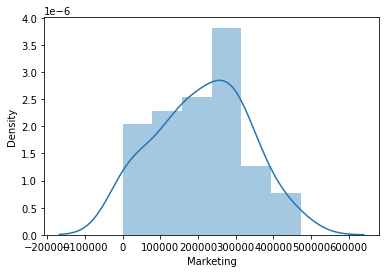

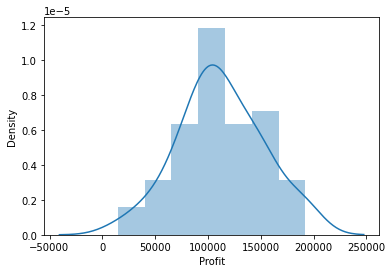

In [20]:
sns.distplot(startup['RD'])
plt.show()
sns.distplot(startup['Administration'])
plt.show()
sns.distplot(startup['Marketing'])
plt.show()
sns.distplot(startup['Profit'])
plt.show()

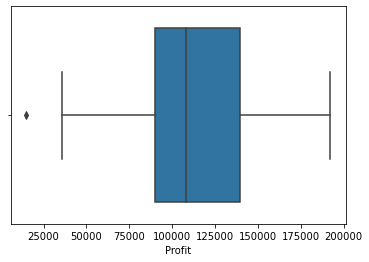

In [24]:
sns.boxplot(startup['Profit'])
plt.show()

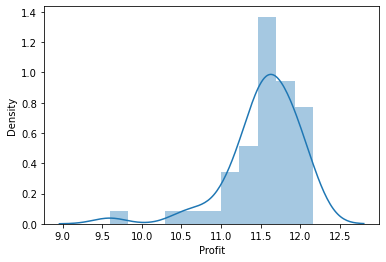

In [21]:
sns.distplot(np.log(startup['Profit']))
plt.show()

In [25]:
#Drop the column State from the dataframe
startup.drop(columns=['State'],axis = 1, inplace = True)
startup.head()

,RD,Administration,Marketing,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


### correlation

In [26]:
corr_data = startup.corr()
corr_data

,RD,Administration,Marketing,Profit
RD,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


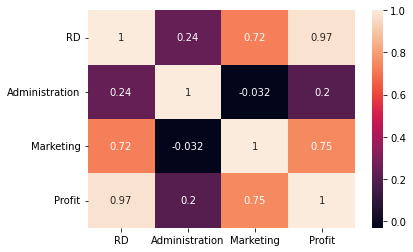

In [27]:
plt.figure(figsize = (6,4))
sns.heatmap(data = corr_data,annot = True)
plt.show()

### Model building

In [28]:
model = smf.ols('Profit~RD+Administration+Marketing',data=startup).fit()
model

In [29]:
model.fittedvalues

0     192521.252890
1     189156.768232
2     182147.279096
3     173696.700026
4     172139.514183
5     163580.780571
6     158114.096669
7     160021.363048
8     151741.699699
9     154884.684110
10    135509.016367
11    135573.712961
12    129138.054182
13    127487.991663
14    149548.646335
15    146235.159985
16    116915.405401
17    130192.447208
18    129014.226806
19    115635.216367
20    116639.669231
21    117319.451640
22    114706.981717
23    109996.615221
24    113362.966113
25    102237.725065
26    110600.575350
27    114408.071457
28    101660.026005
29    101794.983452
30     99452.372936
31     97687.856276
32     99001.328985
33     97915.007805
34     89039.273741
35     90511.599568
36     75286.174585
37     89619.537708
38     69697.430648
39     83729.011977
40     74815.953991
41     74802.556239
42     70620.411821
43     60167.039963
44     64611.354916
45     47650.649687
46     56166.206853
47     46490.588983
48     49171.388158
49     48215.134111


In [30]:
model.params

Intercept         50122.192990
RD                    0.805715
Administration       -0.026816
Marketing             0.027228
dtype: float64

In [32]:
startup['Prediction'] = model.fittedvalues
startup['Prediction_manual']=50122.192990 + 0.805715* startup['RD'] - 0.026816 * startup['Administration'] + 0.027228 * startup['Marketing']
startup['Error']=model.resid
startup

,RD,Administration,Marketing,Profit,Prediction,Prediction_manual,Error
0,165349.20,136897.80,471784.10,192261.83,192521.252890,192521.209738,-259.422890
1,162597.70,151377.59,443898.53,191792.06,189156.768232,189156.726567,2635.291768
2,153441.51,101145.55,407934.54,191050.39,182147.279096,182147.241806,8903.110904
3,144372.41,118671.85,383199.62,182901.99,173696.700026,173696.664237,9205.289974
4,142107.34,91391.77,366168.42,166187.94,172139.514183,172139.480474,-5951.574183
5,131876.90,99814.71,362861.36,156991.12,163580.780571,163580.747320,-6589.660571
6,134615.46,147198.87,127716.82,156122.51,158114.096669,158114.077021,-1991.586669
7,130298.13,145530.06,323876.68,155752.60,160021.363048,160021.330957,-4268.763048
8,120542.52,148718.95,311613.29,152211.77,151741.699699,151741.668789,470.070301
9,123334.88,108679.17,304981.62,149759.96,154884.684110,154884.654756,-5124.724110


In [33]:
print(model.tvalues,'\n',model.pvalues)

Intercept          7.626218
RD                17.846374
Administration    -0.525507
Marketing          1.655077
dtype: float64 
 Intercept         1.057379e-09
RD                2.634968e-22
Administration    6.017551e-01
Marketing         1.047168e-01
dtype: float64


* **Null Hypothesis = The independe variales are not significant(pvalue>0.05).**
* **Alternate Hypothesis = The independent variables are significant(pvalue<0.05).**

In [34]:
model.pvalues

Intercept         1.057379e-09
RD                2.634968e-22
Administration    6.017551e-01
Marketing         1.047168e-01
dtype: float64

**Since all p values are<0.05, the independent variables are significant to predict the dependent variable.**

In [35]:
(model.rsquared,model.rsquared_adj)

(0.9507459940683246, 0.9475337762901719)

In [36]:
m_rd = smf.ols('Profit~RD',data=startup).fit()
print(m_rd.tvalues,'\n',m_rd.pvalues)

Intercept    19.320288
RD           29.151139
dtype: float64 
 Intercept    2.782697e-24
RD           3.500322e-32
dtype: float64


In [37]:
m_ad = smf.ols('Profit~Administration',data=startup).fit()
print(m_ad.tvalues,'\n',m_ad.pvalues)

Intercept         3.040044
Administration    1.419493
dtype: float64 
 Intercept         0.003824
Administration    0.162217
dtype: float64


In [38]:
m_m = smf.ols('Profit~Marketing',data=startup).fit()
print(m_m.tvalues,'\n',m_m.pvalues)

Intercept    7.808356
Marketing    7.802657
dtype: float64 
 Intercept    4.294735e-10
Marketing    4.381073e-10
dtype: float64


In [39]:
m_ram = smf.ols('Profit~RD+Administration+Marketing',data=startup).fit()
print(m_ram.tvalues,'\n',m_ram.pvalues)

Intercept          7.626218
RD                17.846374
Administration    -0.525507
Marketing          1.655077
dtype: float64 
 Intercept         1.057379e-09
RD                2.634968e-22
Administration    6.017551e-01
Marketing         1.047168e-01
dtype: float64


### Calculation of VIF

In [40]:
rsq_RD = smf.ols('RD~Administration+Marketing',data=startup).fit().rsquared
vif_RD = 1/(1-(rsq_RD))

rsq_AD = smf.ols('Administration~RD+Marketing',data=startup).fit().rsquared
vif_AD = 1/(1-(rsq_AD))

rsq_M = smf.ols('Marketing~Administration+RD',data=startup).fit().rsquared
vif_M = 1/(1-(rsq_M))

df={'Variables':['RD','Administration','Marketing'],'VIF':[vif_RD,vif_AD,vif_M]}
vif_frame=pd.DataFrame(df)
vif_frame 

,Variables,VIF
0,RD,2.468903
1,Administration,1.175091
2,Marketing,2.326773


### Residual Analysis

#### Test for Normality of Residuals(Q-Q Plot)

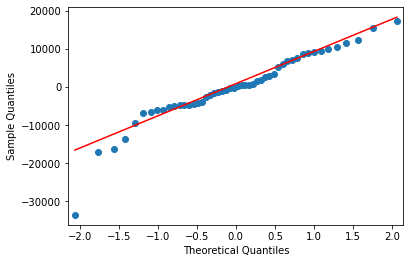

In [41]:
qqplot=sm.qqplot(model.resid,line='q')
plt.title=('Normal Q-Q plot')
plt.show()

In [56]:
list(np.where(model.resid<-18000))

[array([49], dtype=int64)]

<AxesSubplot:>

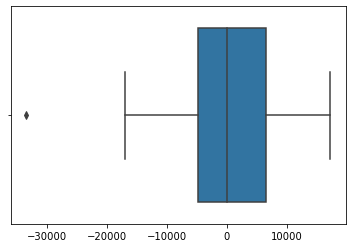

In [57]:
sns.boxplot(model.resid)

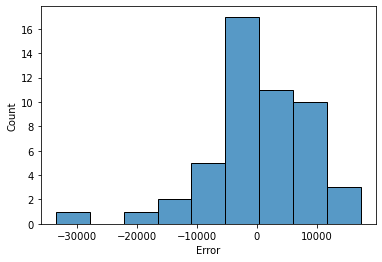

In [58]:
sns.histplot(startup['Error'])
plt.show()

<AxesSubplot:xlabel='Error', ylabel='Density'>

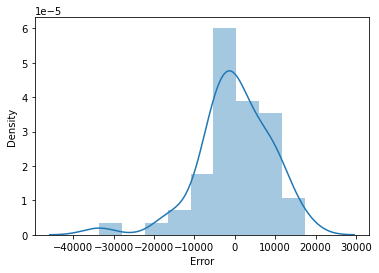

In [59]:
sns.distplot(startup['Error'])

### Residual plot for Homoscedasticity

In [63]:
def get_standardized_values(vals):
    return(vals - vals.mean())/vals.std()

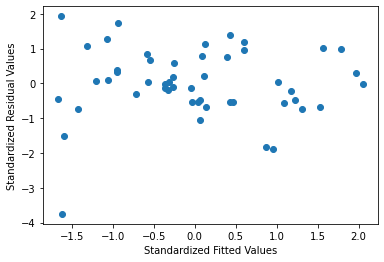

In [61]:
plt.scatter(get_standardized_values(model.fittedvalues),
           get_standardized_values(model.resid))

#plt.title('Residual Plot')
plt.xlabel('Standardized Fitted Values')
plt.ylabel('Standardized Residual Values')
plt.show()

In [64]:
get_standardized_values(model.resid).mean()

-6.217248937900877e-17

### Residual Vs Regressors

eval_env: 1


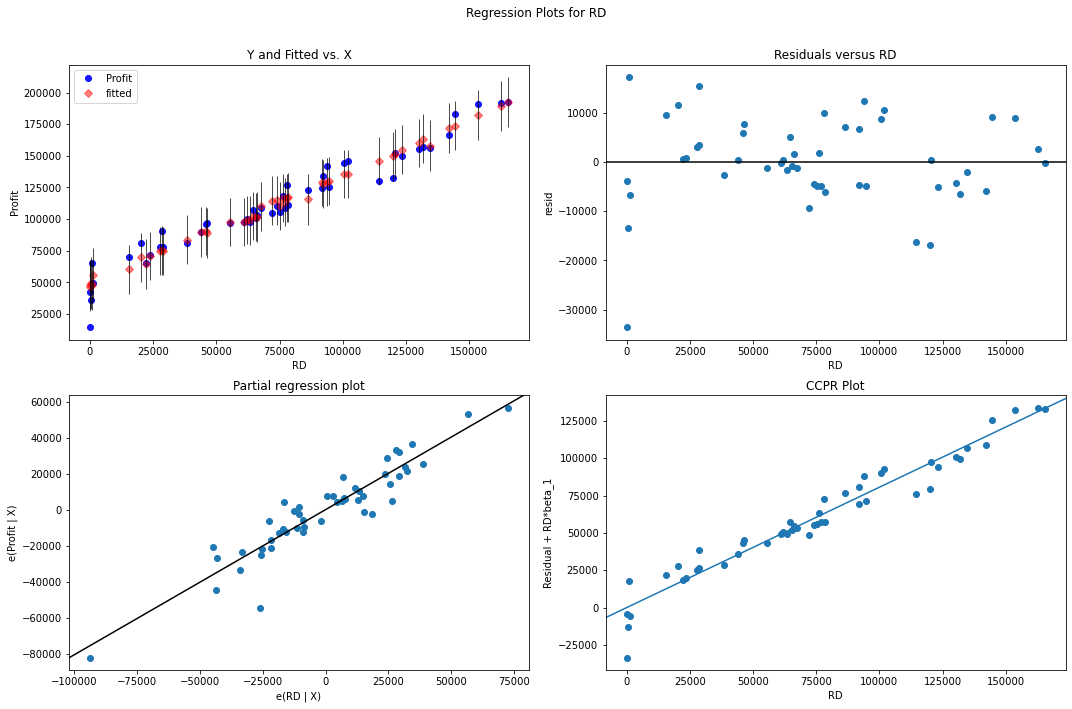

In [65]:
fig = plt.figure(figsize=(15,10))
fig=sm.graphics.plot_regress_exog(model,'RD',fig=fig)

eval_env: 1


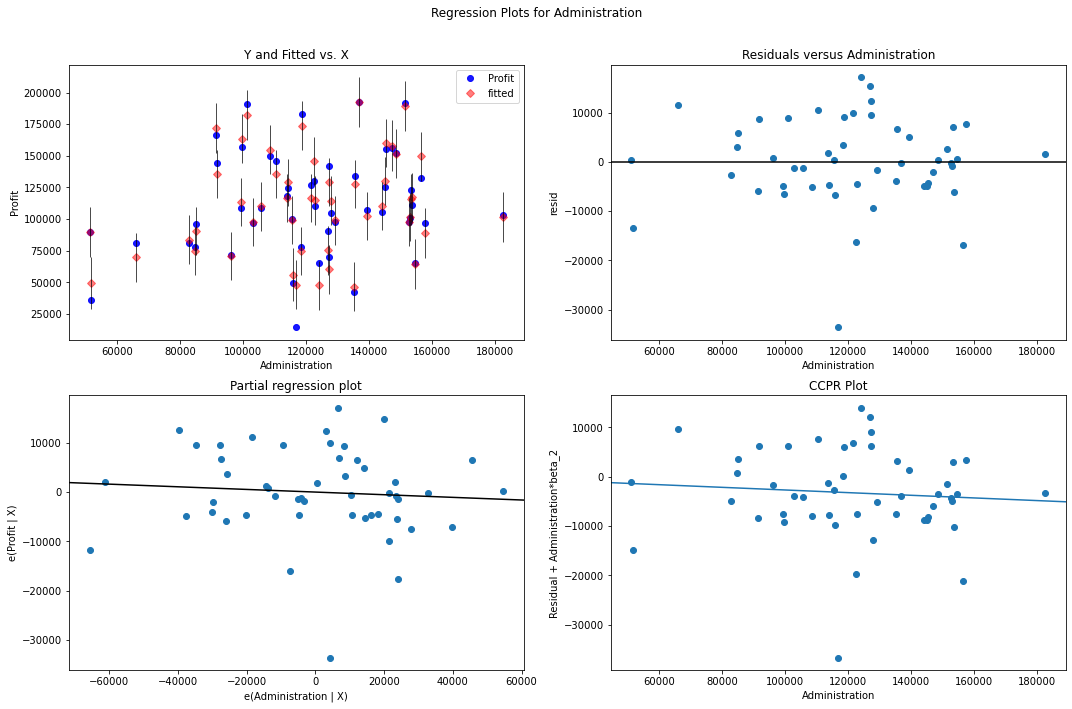

In [67]:
fig=plt.figure(figsize=(15,10))
fig=sm.graphics.plot_regress_exog(model,'Administration',fig=fig)
plt.show()

eval_env: 1


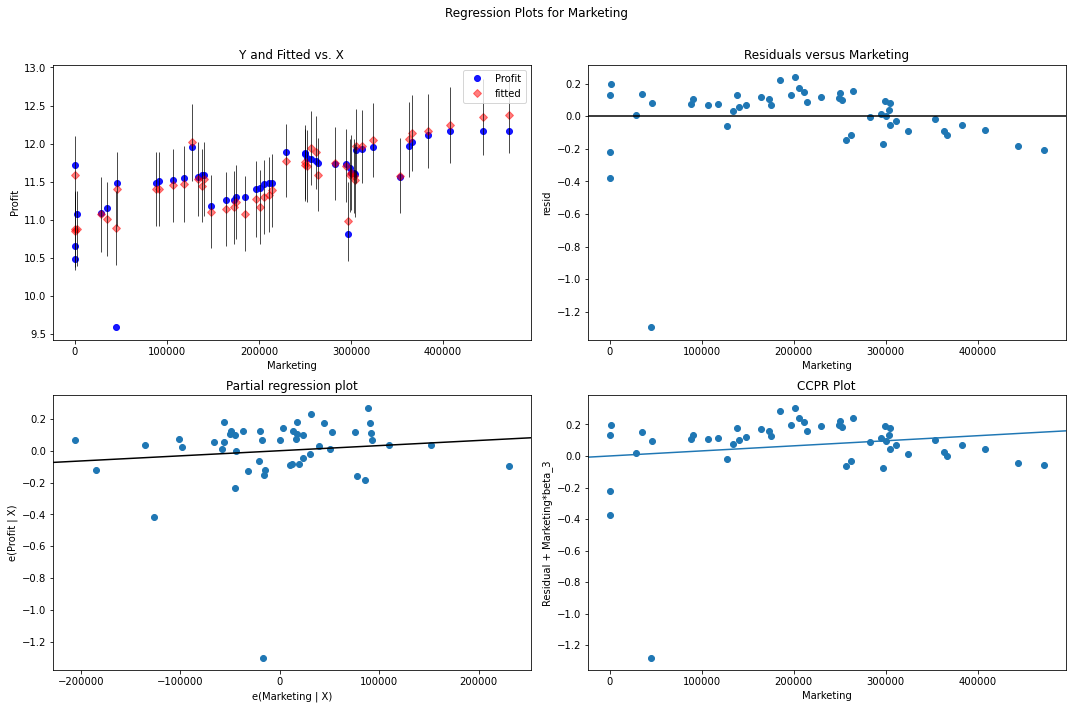

In [62]:
fig=plt.figure(figsize=(15,10))
fig=sm.graphics.plot_regress_exog(model,'Marketing',fig=fig)
plt.show()

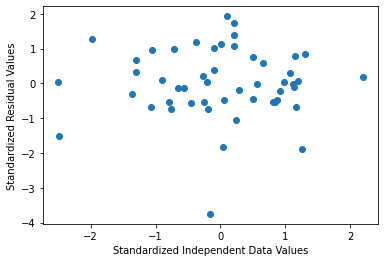

In [68]:
plt.scatter(get_standardized_values(startup.Administration),
           get_standardized_values(startup.Error))
plt.xlabel("Standardized Independent Data Values")
plt.ylabel("Standardized Residual Values")
plt.show()

In [69]:
startup.shape

(50, 7)

In [70]:
model.influence=model.get_influence()
(c,_) = model.get_influence().cooks_distance
c

array([3.21825244e-05, 3.27591036e-03, 3.23842699e-02, 2.17206555e-02,
       1.44833032e-02, 1.17158463e-02, 2.91766303e-03, 3.56513444e-03,
       4.04303948e-05, 4.86758017e-03, 1.51064757e-02, 1.63564959e-02,
       1.15516625e-02, 4.01422811e-03, 6.12934253e-02, 3.40013448e-02,
       8.33556413e-03, 3.30534399e-03, 2.16819303e-03, 4.07440577e-02,
       4.25137222e-04, 1.09844352e-02, 2.91768000e-03, 2.76030254e-04,
       5.04643588e-03, 3.00074623e-03, 3.41957068e-03, 2.98396413e-02,
       1.31590664e-03, 1.25992620e-04, 4.18505125e-05, 9.27434786e-06,
       7.08656521e-04, 1.28122674e-04, 2.09815032e-02, 6.69508674e-03,
       5.55314705e-02, 6.55050578e-05, 5.61547311e-02, 1.54279607e-03,
       1.84850929e-03, 1.97578066e-03, 1.36089280e-04, 2.05553171e-02,
       1.23156041e-04, 9.03234206e-02, 5.45303387e-02, 5.33885616e-03,
       1.90527441e-01, 2.88082293e-01])

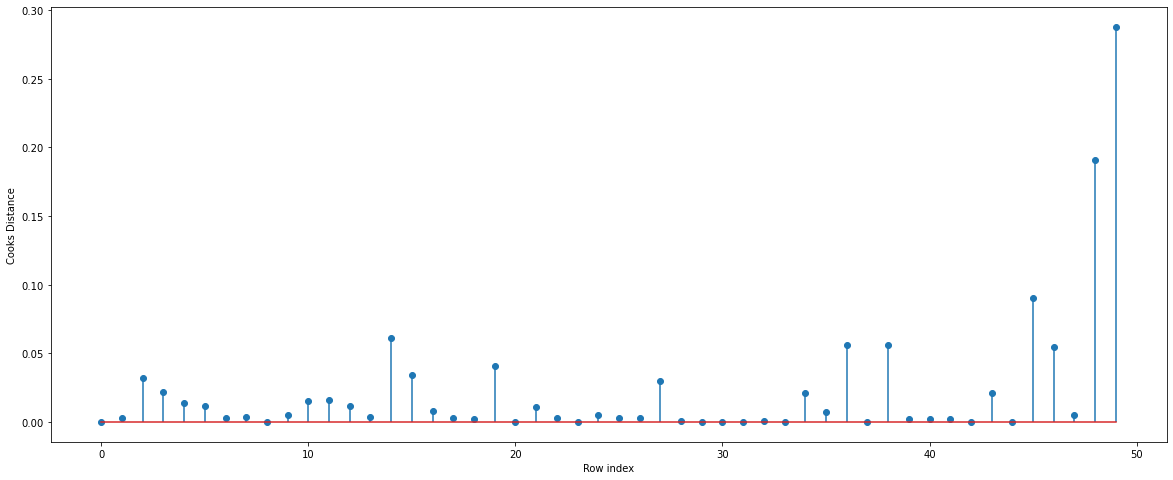

In [71]:
fig = plt.subplots(figsize=(20,8))
plt.stem(np.arange(len(startup)), np.round(c,3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [72]:
(np.argmax(c),np.max(c))

(49, 0.2880822927543267)

### High influence points

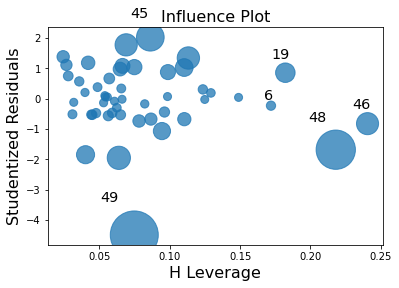

In [73]:
influence_plot(model)
plt.show()

In [74]:
k = startup.shape[1]
n = startup.shape[0]
leverage_cutoff = (3*(k+1))/n
leverage_cutoff

0.48

In [75]:
startup[startup.index.isin([49,48])]

,RD,Administration,Marketing,Profit,Prediction,Prediction_manual,Error
48,542.05,51743.15,0.00,35673.41,49171.388158,49171.386495,-13497.978158
49,0.00,116983.80,45173.06,14681.40,48215.134111,48215.127487,-33533.734111


In [76]:
startup.head()

,RD,Administration,Marketing,Profit,Prediction,Prediction_manual,Error
0,165349.20,136897.80,471784.10,192261.83,192521.252890,192521.209738,-259.422890
1,162597.70,151377.59,443898.53,191792.06,189156.768232,189156.726567,2635.291768
2,153441.51,101145.55,407934.54,191050.39,182147.279096,182147.241806,8903.110904
3,144372.41,118671.85,383199.62,182901.99,173696.700026,173696.664237,9205.289974
4,142107.34,91391.77,366168.42,166187.94,172139.514183,172139.480474,-5951.574183


In [77]:
startup1 = startup.drop(startup.index[[49]],axis=0).reset_index(drop=True)
startup1

,RD,Administration,Marketing,Profit,Prediction,Prediction_manual,Error
0,165349.20,136897.80,471784.10,192261.83,192521.252890,192521.209738,-259.422890
1,162597.70,151377.59,443898.53,191792.06,189156.768232,189156.726567,2635.291768
2,153441.51,101145.55,407934.54,191050.39,182147.279096,182147.241806,8903.110904
3,144372.41,118671.85,383199.62,182901.99,173696.700026,173696.664237,9205.289974
4,142107.34,91391.77,366168.42,166187.94,172139.514183,172139.480474,-5951.574183
5,131876.90,99814.71,362861.36,156991.12,163580.780571,163580.747320,-6589.660571
6,134615.46,147198.87,127716.82,156122.51,158114.096669,158114.077021,-1991.586669
7,130298.13,145530.06,323876.68,155752.60,160021.363048,160021.330957,-4268.763048
8,120542.52,148718.95,311613.29,152211.77,151741.699699,151741.668789,470.070301
9,123334.88,108679.17,304981.62,149759.96,154884.684110,154884.654756,-5124.724110


In [78]:
while np.max(c)>0.5:
    model = smf.ols('Profit~RD+Administration+Marketing',data=startup1).fit()
    (c,_) = model.get_influence().cooks_distance
    c
    np.argmax(c) , np.max(c)
    startup1 = startup1.drop(startup1.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
    startup1
else:
    final_model = smf.ols('Profit~RD+Administration+Marketing',data=startup1).fit()
    final_model.rsquared, final_model.aic
    print('Thus model accuracy is improved to', final_model.rsquared)


Thus model accuracy is improved to 0.9613162435129847


In [79]:
final_model.rsquared

0.9613162435129847

In [80]:
startup1

,RD,Administration,Marketing,Profit,Prediction,Prediction_manual,Error
0,165349.20,136897.80,471784.10,192261.83,192521.252890,192521.209738,-259.422890
1,162597.70,151377.59,443898.53,191792.06,189156.768232,189156.726567,2635.291768
2,153441.51,101145.55,407934.54,191050.39,182147.279096,182147.241806,8903.110904
3,144372.41,118671.85,383199.62,182901.99,173696.700026,173696.664237,9205.289974
4,142107.34,91391.77,366168.42,166187.94,172139.514183,172139.480474,-5951.574183
5,131876.90,99814.71,362861.36,156991.12,163580.780571,163580.747320,-6589.660571
6,134615.46,147198.87,127716.82,156122.51,158114.096669,158114.077021,-1991.586669
7,130298.13,145530.06,323876.68,155752.60,160021.363048,160021.330957,-4268.763048
8,120542.52,148718.95,311613.29,152211.77,151741.699699,151741.668789,470.070301
9,123334.88,108679.17,304981.62,149759.96,154884.684110,154884.654756,-5124.724110


### Model Prediction

In [82]:
new_data = pd.DataFrame({'RD':10000, 'Administration':12560, 'Marketing': 41000},index=[0])
new_data

,RD,Administration,Marketing
0,10000,12560,41000


In [83]:
final_model.predict(new_data)

0    60968.187419
dtype: float64

In [84]:
pred = final_model.predict(startup1)
pred

0     190716.676999
1     187537.122227
2     180575.526396
3     172461.144642
4     170863.486721
5     162582.583177
6     157741.338633
7     159347.735318
8     151328.826941
9     154236.846778
10    135507.792682
11    135472.855621
12    129355.599449
13    127780.129139
14    149295.404796
15    145937.941975
16    117437.627921
17    130408.626295
18    129129.234457
19    116641.003121
20    117097.731866
21    117911.019038
22    115248.217796
23    110603.139045
24    114051.073877
25    103398.054385
26    111547.638935
27    114916.165026
28    103027.229434
29    103057.621761
30    100656.410227
31     99088.213693
32    100325.741335
33     98962.303136
34     90552.307809
35     91709.288672
36     77080.554255
37     90722.503244
38     71433.021956
39     85147.375646
40     76625.510303
41     76492.145175
42     72492.394974
43     62592.049718
44     67025.731107
45     50457.297206
46     58338.443625
47     49375.776655
48     51658.096812
dtype: float64

In [85]:
(model.rsquared , final_model.rsquared)

(0.9507459940683246, 0.9613162435129847)

In [86]:
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     372.8
Date:                Fri, 19 Aug 2022   Prob (F-statistic):           8.85e-32
Time:                        22:10:56   Log-Likelihood:                -506.28
No. Observations:                  49   AIC:                             1021.
Df Residuals:                      45   BIC:                             1028.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       5.238e+04   5542.657      9.451      0.000    4.12e+04    6.35e+04
RD                 0.7830      0.038     20.470      0.000       0.706       0.860
Administration    -0.0222      0.043     -0.518      0.607      -0.109       0.064
Marketing          0.0252      0.014      1.825      0.075      -0.003       0.053
==============================================================================
Omnibus:                        0.082   Durbin-Watson:                   1.598
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.232
Skew:                          -0.082   Prob(JB):                        0.890
Kurtosis:                       2.706   Cond. No.                     1.41e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""